# Hill Climbing

---

In this notebook, we train **hill climbing with adaptive noise scaling** with OpenAI Gym's Cartpole environment.

Try different random seeds for environment and numpy.random to see the efect on training or stability of the trained agent.

### 1. Import the Necessary Packages

In [1]:
import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Define the Policy

In [2]:
env = gym.make('CartPole-v0')
print('observation space:', env.observation_space)
print('action space:', env.action_space)

class Policy():
    ''' Policy(agent) built with a single linear combination built directly; no support on pyTorch'''
    def __init__(self, s_size=4, a_size=2):
        self.w = 1e-4 * np.random.rand(s_size, a_size)  # random weights for simple linear policy: state_space x action_space
        
    def forward(self, state):           # Direct building; no supporn
        x = np.dot(state, self.w)       # linear combination
        return np.exp(x)/sum(np.exp(x)) # softmax function to get probabilities
    
    def act(self, state):
        probs = self.forward(state)
        #action = np.random.choice(2, p=probs) # option 1: stochastic policy
        action = np.argmax(probs)              # option 2: deterministic policy
        return action

observation space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
action space: Discrete(2)


### 3. Train the Agent with Stochastic Policy Search

In [26]:
env = gym.make('CartPole-v0')

# Try different random seeds to see effect on training
env.seed(0)
np.random.seed(4)

policy = Policy()   # instantiate class Policy

def hill_climbing(n_episodes=1000, max_t=1000, gamma=1., print_every=100, noise_scale=1e-2):
    """Implementation of hill climbing with adaptive noise scaling.
        
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        gamma (float): discount rate
        print_every (int): how often to print average score (over last 100 episodes)
        noise_scale (float): standard deviation of additive noise
    """
    scores_deque = deque(maxlen=100)
    scores = []
    best_R = -np.Inf
    best_w = policy.w
    # Episode loop
    for i_episode in range(1, n_episodes+1):
        rewards = []
        state = env.reset()
        # Timestep loop
        for t in range(max_t):
            action = policy.act(state)                # get new action from policy
            state, reward, done, _ = env.step(action) # interaction with environment
            rewards.append(reward)
            if done:
                break 
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))
        
        # Return calculation of the episode
        discounts = [gamma**i for i in range(len(rewards)+1)] 
        R = sum([a*b for a,b in zip(discounts, rewards)])
        
        # Reward evaluation and adjustment: policy update with noise scaling as appropriate
        if R >= best_R: # found better weights
            best_R = R
            best_w = policy.w 
            noise_scale = max(1e-3, noise_scale / 2)   # noise scale reduction
            policy.w += noise_scale * np.random.rand(*policy.w.shape) 
        else: # did not find better weights
            noise_scale = min(2, noise_scale * 2)      # noise scale incresament
            policy.w = best_w + noise_scale * np.random.rand(*policy.w.shape)

        if i_episode % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            policy.w = best_w
            break
        
    return scores
            
scores = hill_climbing()

Episode 100	Average Score: 186.37
Episode 200	Average Score: 176.98
Episode 300	Average Score: 114.83
Episode 400	Average Score: 192.96
Environment solved in 360 episodes!	Average Score: 195.33


### 4. Plot the Scores

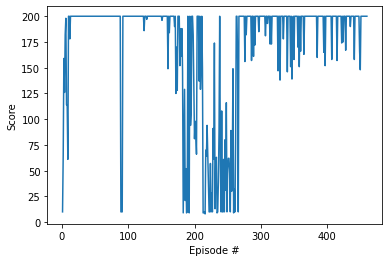

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch a Smart Agent!

In [22]:
env = gym.make('CartPole-v0')
env.seed(np.random.randint(low=0, high=100))   # Random seed to test stability.
state = env.reset()
actions = []
for t in range(200):
    action = policy.act(state)
    actions.append(action)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 
print(actions)

env.close()


[0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0]


### 6. And compare with a Random Agent

In [19]:
env = gym.make('CartPole-v0')
env.seed(np.random.randint(low=0, high=100))  # Random seed to test stability.
state = env.reset()
action_space = [0, 1]
actions = []
for t in range(200):
    action = np.random.choice(action_space)
    actions.append(action)
    env.render()
    state, reward, done, _ = env.step(action)
    #if done:
        #break 
print(actions)

env.close()

/Users/felixramonlopezmartinez/opt/anaconda3/envs/drlnd/lib/python3.6/site-packages/gym/envs/classic_control/cartpole.py:151: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  "You are calling 'step()' even though this "


[1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]
